In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Automatically created module for IPython interactive environment


In [78]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
#    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                         train_scores_mean + train_scores_std, alpha=0.1,
#                         color="r")
#    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                         test_scores_mean + test_scores_std, alpha=0.1,
#                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    for X, Y in zip(train_sizes, train_scores_mean):
        # Annotate the points 5 _points_ above and to the left of the vertex
        axes.annotate('{}'.format(X), xy=(X,Y), xytext=(-5, 5), ha='right', textcoords='offset points')
#    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")


    return plt

In [79]:
len(X)

1797

train_sizes = [0.1   0.325 0.55  0.775 1.   ]


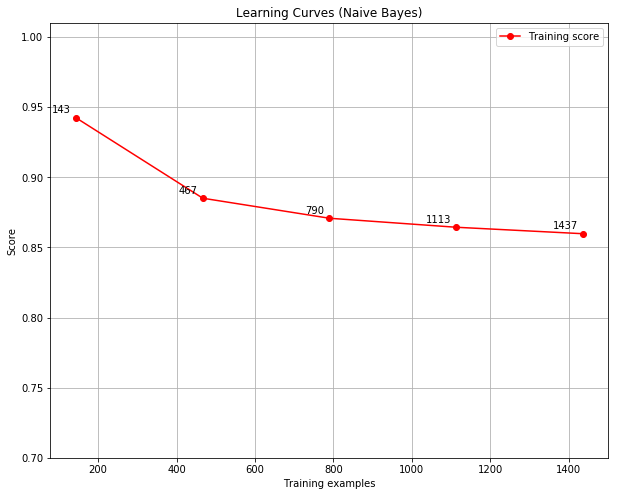

In [80]:
#fig, axes = plt.subplots(3, 2, figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 8))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
train_sizes = np.linspace(.1, 1.0, 5)

plot_learning_curve(estimator, title, X, y, axes=ax, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4, train_sizes=train_sizes)

#title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
#                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


In [82]:
from sklearn.datasets import make_classification
# generate random 2-class classification set
# https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html
X, y = make_classification(n_samples=10000, n_classes=2, n_features=2, random_state=42,
                           n_clusters_per_class=1, n_redundant=0, n_informative=2)

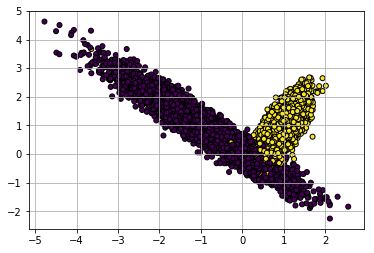

In [83]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k', label=y)
ax.grid(True)

**Each row in cv_iter designates a split.<br>
1st column designates the training set and<br>
2nd column designates the testing set indices for that split.**

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import check_cv
from sklearn.base import is_classifier
from sklearn.utils import check_random_state

estimator = LogisticRegression()
cv = check_cv(cv=5, y=y, classifier=is_classifier(estimator))
cv_iter = list(cv.split(X, y))

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator=estimator, X=X, y=y, 
                                                              train_sizes = [100, 500, 1000, 1500], cv = 5, shuffle=True)

In [87]:
# shuffle=False
print('Train sizes')
print(train_sizes)
print('Train scores')
print(train_scores)
print('Validation scores')
print(validation_scores)

Train sizes
[ 100  500 1000 1500]
Train scores
[[0.95       0.98       0.98       0.96       1.        ]
 [0.974      0.96       0.974      0.972      0.992     ]
 [0.977      0.969      0.981      0.976      0.986     ]
 [0.97666667 0.97533333 0.978      0.97666667 0.982     ]]
Validation scores
[[0.9615 0.9775 0.958  0.9725 0.9615]
 [0.9695 0.978  0.981  0.9765 0.9785]
 [0.9705 0.9775 0.9805 0.977  0.9795]
 [0.9695 0.978  0.98   0.9775 0.98  ]]


In [88]:
# shuffle=True
print('Train sizes')
print(train_sizes)
print('Train scores')
print(train_scores)
print('Validation scores')
print(validation_scores)

Train sizes
[ 100  500 1000 1500]
Train scores
[[0.95       0.98       0.98       0.96       1.        ]
 [0.974      0.96       0.974      0.972      0.992     ]
 [0.977      0.969      0.981      0.976      0.986     ]
 [0.97666667 0.97533333 0.978      0.97666667 0.982     ]]
Validation scores
[[0.9615 0.9775 0.958  0.9725 0.9615]
 [0.9695 0.978  0.981  0.9765 0.9785]
 [0.9705 0.9775 0.9805 0.977  0.9795]
 [0.9695 0.978  0.98   0.9775 0.98  ]]


**Since we specified 3 training set sizes, you might have expected 3 values for each kind of score (training score and validation score)**

In [89]:
# shuffle=False
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('train_scores_mean=\t{},\nvalidation_scores_mean=\t{}'.format(train_scores_mean, validation_scores_mean))

train_scores_mean=	[0.974      0.9744     0.9778     0.97773333],
validation_scores_mean=	[0.9662 0.9767 0.977  0.977 ]


In [90]:
# shuffle=True
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('train_scores_mean=\t{},\nvalidation_scores_mean=\t{}'.format(train_scores_mean, validation_scores_mean))

train_scores_mean=	[0.974      0.9744     0.9778     0.97773333],
validation_scores_mean=	[0.9662 0.9767 0.977  0.977 ]


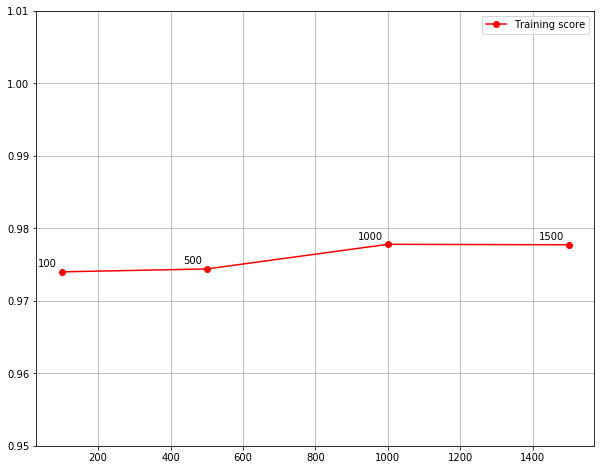

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))
ylim=(0.95, 1.01)
ax.set_ylim(*ylim)
ax.set_title('Logistic Regression learn')
ax.grid(True)
ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
for X, Y in zip(train_sizes, train_scores_mean):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(X), xy=(X,Y), xytext=(-5, 5), ha='right', textcoords='offset points')
#    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

In [92]:
train_scores

array([[0.95      , 0.98      , 0.98      , 0.96      , 1.        ],
       [0.974     , 0.96      , 0.974     , 0.972     , 0.992     ],
       [0.977     , 0.969     , 0.981     , 0.976     , 0.986     ],
       [0.97666667, 0.97533333, 0.978     , 0.97666667, 0.982     ]])